# BLUF
In this project, we deploy machine learning classifiers to predict startups success. The dataset consists of the target named ‘status’, and 48 features including location, founding time, and business category, of 923 Startup samples. After model fitting, Random Forest outperforms other classifiers, with an accuracy of 0.795 and an auc score of 0.837.

## Workflow
1.   Data preprocessing: Missing value & Duplicates check, Outlier drop, Label encoding, Descriptive analysis
2.  Predictors & Target separate-‘status’ column; Train & Test separate
3.  Balancing-SMOTE, Scaling
4.  Feature engineering-RFE & EDA
5. Model fitting (RandomForest, KNN, LogisticRegression, DecisionTree, Gradient Boosting, AdaBoost, LGBM)
6. Comparison leaderboard-classifier metrics(Accuracy, cv_auc, F-1, confusion matrix)
7. Tuning/Hyperparameters-Gridsearch, Feature importance
8. Model comparison
9. Conclusion

## Conclusion
Among RandomForest, KNN, LogisticRegression, DecisionTree, Gradient Boosting, AdaBoost and LGBM, the most efficient model we choose is **RandomForest**. The accuracy and AUC score are 0.795 and 0.837 respectively. Next, the best parameter set is {'clf__bootstrap': False, 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}. \\

**The most important 10 features of prediting startup status are:**  
 'age_last_milestone_year', 'relationships','funding_total_usd', 'age_first_milestone_year', 'milestones', 'age_first_funding_year', 'age_last_funding_year', 'founded_year', 'avg_participants', 'funding_rounds'.

Based on the feature importance, we can conclude three aspects that play important roles in startup success, including **age, funding (times and scales) and number of participants**.

# Feature Definition
- state_code & zip_code & latitude & longitude & city: startup locations
- name: full name of startups
- founded_at & Closed_at: MM/DD/YYYY of starup's start and end date
- first_funding_at & last_funding_at: MM/DD/YYYY when startups receive funds for the first and last time before acquired or closed.
- age_first_funding_year & age_last_funding_year: the age of the company in years since it got first and last funding.
- funding_rounds: times of funding startups received before acquired or closed.
- funding_total_usd: total amount of funding startups received before acquired or closed.
- milestones: milestone refers to crucial events tracking, say found, funding, coporation, etc. milestones, instead, means times of milestone events happened in starups
- relationships: it says how many relationship does a startup have. For example a start up can have relationships with accountants, investors, vendors, mentors, etc.
- avg_participants: average team size for a startup throught out all funding rounds.
- category_code & is_x sets: explicit starups industries, including software, web,mobile,enterprise,advertising,gamesvideo,ecommerce,biotech,consulting, and othercategory.
- has_VC & has_angel: Dummy variables that represent whether a startup has received funding from venture capital (VC) firms and angel investors, respectively.
- has_roundA & has_roundB &	has_roundC &	has_roundD: Dummy variables indicating whether a startup has completed funding rounds of different stages, typically labeled as Round A, Round B, Round C, and Round D.
- is_top500: dummy varibale explicting whether a starup become or been acquired by a top 500 company at the end.


In [ ]:
!pip install folium
!pip install autoviz

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score, accuracy_score,classification_report, confusion_matrix, precision_score, recall_score

In [ ]:
df = pd.read_csv('/content/startup data.csv')
print(df.shape, df.size)

df.head()

(923, 49) 45227


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


### Data Preposessing (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [ ]:
print(df['state_code'].equals(df['state_code.1']))
abdf = df.loc[df['state_code'] != df['state_code.1']]
abdf.style.set_properties(**{'background-color': 'yellow'}, subset=['state_code','state_code.1'])

False


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
515,1110,CA,37.451124,-122.166264,94025,c:856,Menlo Park,nan,Cuil,0,1/1/2005,9/1/2010,3/1/2007,4/15/2008,2.161600,3.287700,3.498600,7.690400,13,2,33000000,4,nan,0,0,0,0,0,search,0,0,0,0,0,0,0,0,0,1,c:856,0,0,1,1,0,0,2.500000,1,closed


In [ ]:
state = df['state_code'].value_counts().to_frame()
state['proportion%'] = state['count']/sum(state['count'])*100
state

,count,proportion%
state_code,,
CA,488,52.871073
NY,106,11.484290
MA,83,8.992416
TX,42,4.550379
WA,42,4.550379
CO,19,2.058505
IL,18,1.950163
PA,17,1.841820
VA,13,1.408451


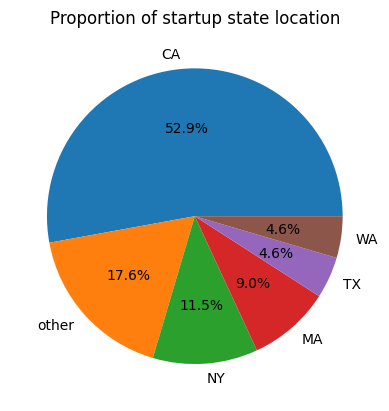

In [ ]:
# aggregate state info into one feature
df['State'] = 'other'
df.loc[(df['state_code'] == 'CA'), 'State'] = 'CA'
df.loc[(df['state_code'] == 'NY'), 'State'] = 'NY'
df.loc[(df['state_code'] == 'MA'), 'State'] = 'MA'
df.loc[(df['state_code'] == 'TX'), 'State'] = 'TX'
df.loc[(df['state_code'] == 'WA'), 'State'] = 'WA'
state_count = df['State'].value_counts()
plt.pie(state_count, labels = state_count.index, autopct = '%1.1f%%')
plt.title('Proportion of startup state location')
plt.show()

In [ ]:
# aggregate industry info into one feature
category = df['category_code'].value_counts().to_frame()
category['proportion%'] = category['count']/sum(category['count'])*100
category

,count,proportion%
category_code,,
software,153,16.576381
web,144,15.601300
mobile,79,8.559047
enterprise,73,7.908992
advertising,62,6.717226
games_video,52,5.633803
semiconductor,35,3.791983
network_hosting,34,3.683640
biotech,34,3.683640


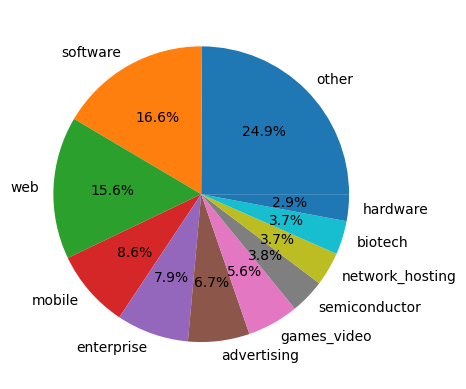

In [ ]:
df['category'] = 'other'
df.loc[(df['category_code'] == 'software'), 'category'] = 'software'
df.loc[(df['category_code'] == 'web'), 'category'] = 'web'
df.loc[(df['category_code'] == 'mobile'), 'category'] = 'mobile'
df.loc[(df['category_code'] == 'enterprise'), 'category'] = 'enterprise'
df.loc[(df['category_code'] == 'advertising'), 'category'] = 'advertising'
df.loc[(df['category_code'] == 'games_video'), 'category'] = 'games_video'
df.loc[(df['category_code'] == 'semiconductor'), 'category'] = 'semiconductor'
df.loc[(df['category_code'] == 'network_hosting'), 'category'] = 'network_hosting'
df.loc[(df['category_code'] == 'biotech'), 'category'] = 'biotech'
df.loc[(df['category_code'] == 'hardware'), 'category'] = 'hardware'
category_count = df['category'].value_counts()
plt.pie(category_count, labels = category_count.index, autopct = '%1.1f%%')
plt.show()

In [ ]:
clist = pd.Series(df.isnull().sum()[df.isnull().any()].sort_values(ascending = False))
clist = list(clist.index)
for col in clist:
  print("% of NaN in '{}' is {}".format(col, df[col].isnull().mean() *100))

% of NaN in 'closed_at' is 63.705308775731304
% of NaN in 'Unnamed: 6' is 53.412784398699884
% of NaN in 'age_first_milestone_year' is 16.468039003250272
% of NaN in 'age_last_milestone_year' is 16.468039003250272
% of NaN in 'state_code.1' is 0.10834236186348861


In [ ]:
# drop undefined and unnecessary startup features
cols_to_drop = ['id','Unnamed: 0','Unnamed: 6','zip_code','longitude','latitude','name','state_code.1','state_code','is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate','labels', 'object_id','category_code','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory']
df_refine=df.drop(cols_to_drop,axis=1,inplace=False)
df_refine.shape

(923, 24)

Text(0.5, 1.0, 'Distribution of Status of the Startup')

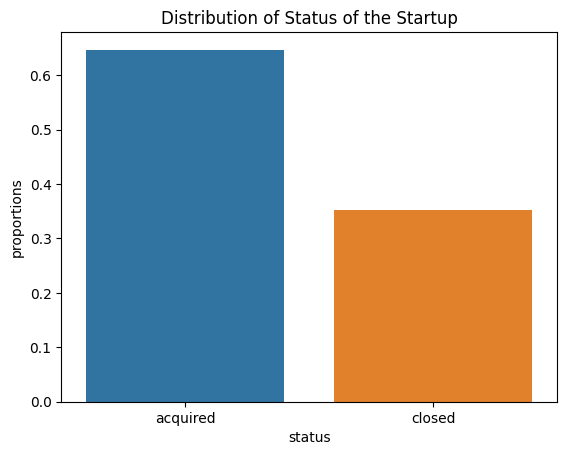

In [ ]:
# label target variable
df_refine['status'] = df_refine['status'].replace({'acquired':1, 'closed':0})
prop_df = df.groupby('status').size().reset_index(name = 'counts')
prop_df['proportions'] = prop_df['counts']/prop_df['counts'].sum()
colors = ["#1f77b4", "#ff7f0e"]
sns.barplot(data = prop_df, x = 'status', y = 'proportions',palette=colors)
plt.title('Distribution of Status of the Startup')

In [ ]:
df_refine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   city                      923 non-null    object 
 1   founded_at                923 non-null    object 
 2   closed_at                 335 non-null    object 
 3   first_funding_at          923 non-null    object 
 4   last_funding_at           923 non-null    object 
 5   age_first_funding_year    923 non-null    float64
 6   age_last_funding_year     923 non-null    float64
 7   age_first_milestone_year  771 non-null    float64
 8   age_last_milestone_year   771 non-null    float64
 9   relationships             923 non-null    int64  
 10  funding_rounds            923 non-null    int64  
 11  funding_total_usd         923 non-null    int64  
 12  milestones                923 non-null    int64  
 13  has_VC                    923 non-null    int64  
 14  has_angel 

In [ ]:
# check contrast 'close_at' and 'status' sample
# change 'found_at' column into a new 'found_year' column
df_refine['founded_at'] = pd.to_datetime(df_refine['founded_at'])
df_refine['first_funding_at'] = pd.to_datetime(df_refine['first_funding_at'])
df_refine['last_funding_at'] = pd.to_datetime(df_refine['last_funding_at'])
df_refine['founded_at'] = df_refine['founded_at'].apply(pd.to_datetime)
df_refine['founded_year'] = df_refine['founded_at'].dt.strftime('%Y')
df_refine['closed_at'] = df_refine['closed_at'].fillna(0)
df_refine['closed_at'] = df_refine['closed_at'].apply(str)
abdf = df_refine.loc[(df_refine['closed_at']!='0') & (df_refine['status'] == 1)]
abdf.style.set_properties(**{'background-color': 'yellow'}, subset=['closed_at','status'])

,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year
73,San Francisco,2003-01-01 00:00:00,2/1/2001,2004-09-01 00:00:00,2012-05-01 00:00:00,1.668500,9.337000,7.380800,10.474000,17,4,40400000,3,0,0,1,1,1,1,1.666700,1,1,CA,advertising,2003
104,San Francisco,2007-07-01 00:00:00,9/1/2011,2007-01-01 00:00:00,2008-10-01 00:00:00,-0.495900,1.254800,2.172600,4.600000,21,2,6000000,2,0,1,1,0,0,0,4.000000,1,1,CA,web,2007
291,Columbia,2000-01-01 00:00:00,10/15/2009,2007-04-24 00:00:00,2007-04-24 00:00:00,7.315100,7.315100,5.005500,5.005500,6,1,16980999,1,0,0,0,1,0,0,1.000000,1,1,other,biotech,2000
342,Austin,2003-01-01 00:00:00,6/1/2013,2007-06-14 00:00:00,2010-03-23 00:00:00,4.452100,7.227400,7.005500,7.005500,5,2,5992316,1,1,0,1,0,0,0,2.000000,0,1,TX,enterprise,2003
381,Redwood City,2006-03-01 00:00:00,1/1/2012,2007-06-01 00:00:00,2008-01-14 00:00:00,1.252100,1.874000,4.717800,5.095900,13,3,2600000,2,0,1,1,0,0,0,3.666700,1,1,CA,network_hosting,2006
445,Cambridge,2006-01-01 00:00:00,1/1/2008,2008-01-03 00:00:00,2008-01-03 00:00:00,2.005500,2.005500,0.000000,0.000000,1,1,30000000,1,1,0,0,0,0,0,2.000000,1,1,MA,other,2006
473,Burlingame,2007-01-01 00:00:00,12/1/2011,2007-08-01 00:00:00,2009-07-06 00:00:00,0.580800,2.512300,0.591800,4.969900,9,3,1415000,4,1,1,0,0,0,0,1.000000,1,1,CA,other,2007
560,San Francisco,2006-10-01 00:00:00,11/16/2010,2007-12-01 00:00:00,2007-12-01 00:00:00,1.167100,1.167100,1.926000,4.013700,19,1,3000000,4,0,0,1,0,0,0,2.000000,1,1,CA,advertising,2006
756,Mountain View,2004-12-06 00:00:00,5/19/2011,2006-04-04 00:00:00,2007-08-22 00:00:00,1.326000,2.709600,4.369900,6.463000,6,2,29000000,3,0,0,0,1,1,0,2.500000,1,1,CA,software,2004


In [ ]:
df_refine = df_refine.drop(abdf.index.tolist()).reset_index().drop(['index'],axis = 1)
df_refine = df_refine.drop(['founded_at','closed_at'], axis = 1)
prop_df = df_refine.groupby('founded_year').size().reset_index(name = 'counts')
prop_df['proportions'] = prop_df['counts']/prop_df['counts'].sum()

<Axes: title={'center': 'Distribution of number of startups with year (acquired/not)'}, xlabel='Year Founded', ylabel='Proportions'>

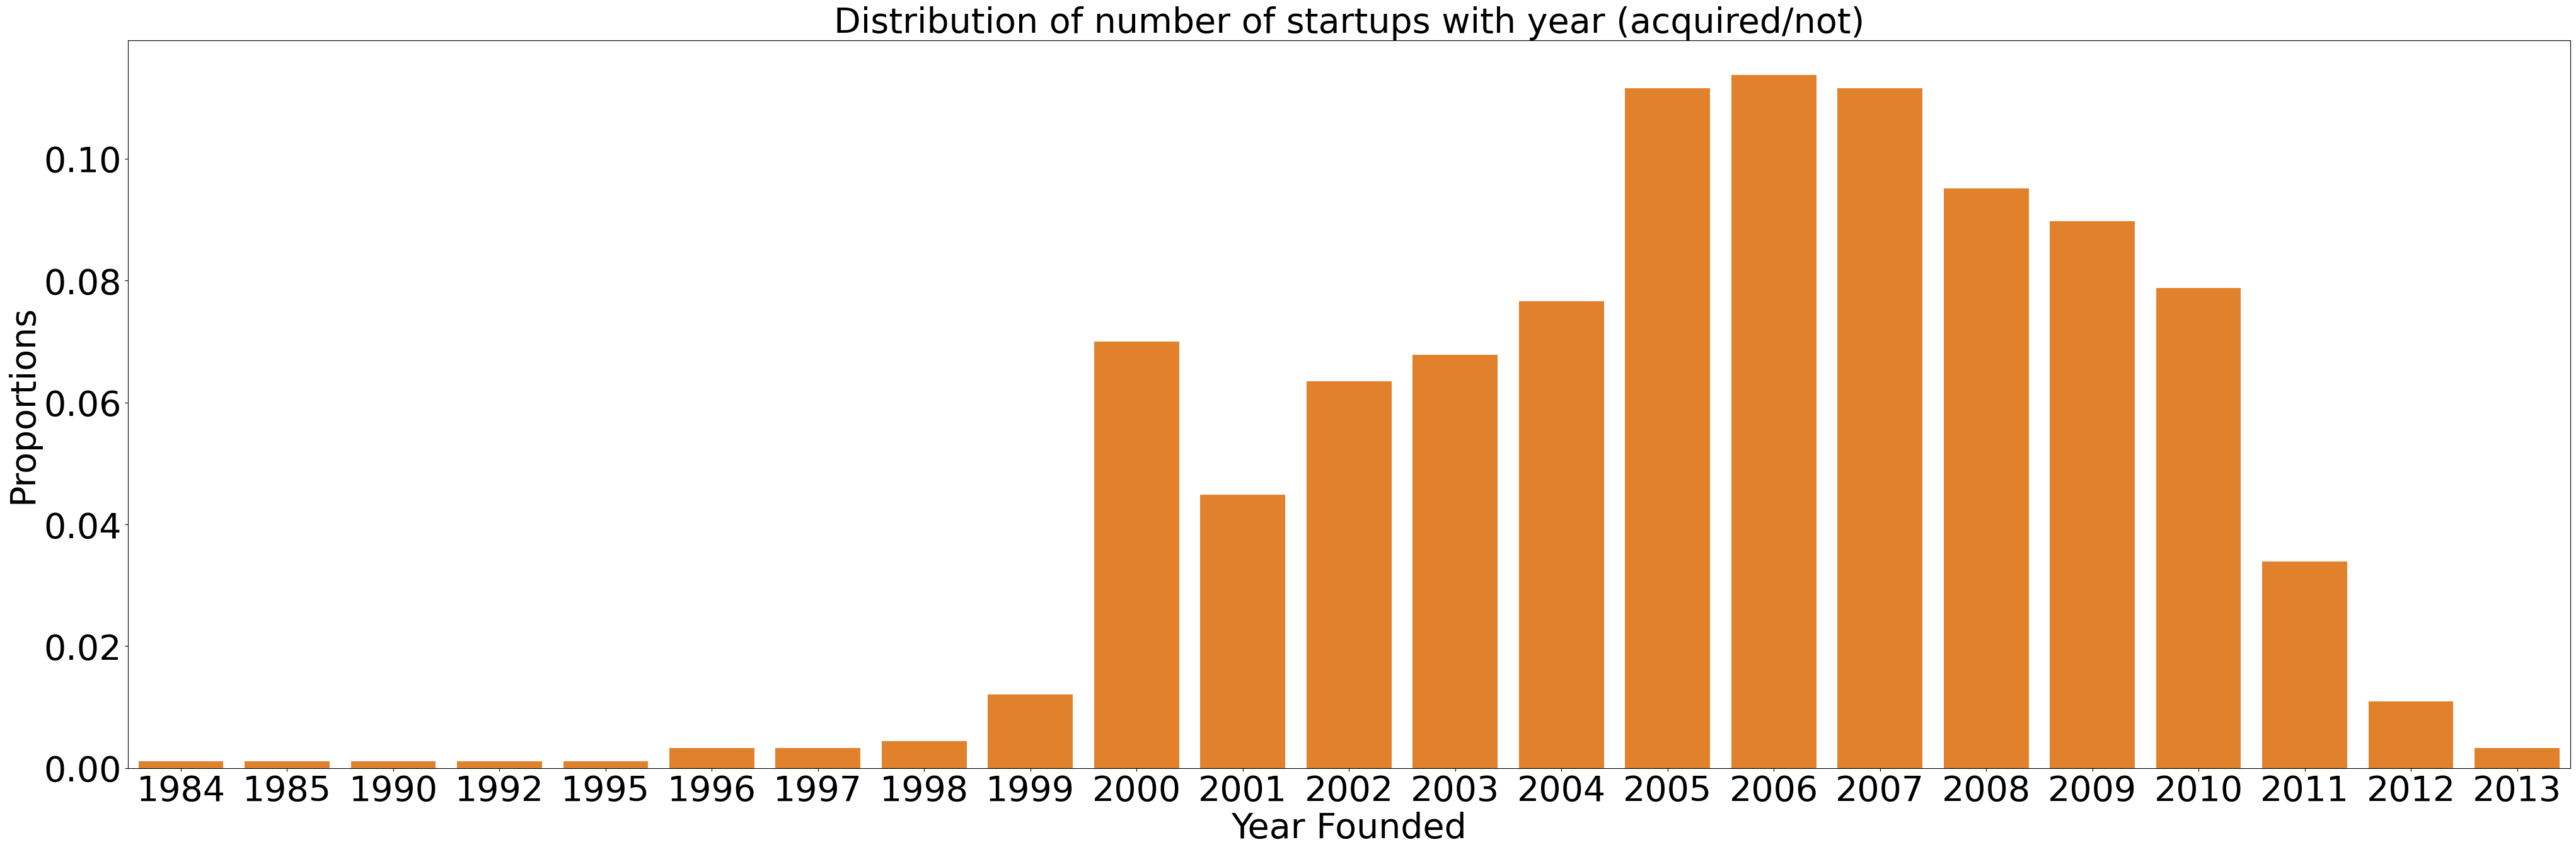

In [ ]:
# barchart for found year
fig, ax = plt.subplots(figsize = (50,15))
sns.barplot(data=prop_df, x='founded_year', y='proportions')
# Set font size
plt.title('Distribution of number of startups with year (acquired/not)', fontsize=40)
plt.xlabel('Year Founded', fontsize=40)
plt.ylabel('Proportions', fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.barplot(data = prop_df, x = 'founded_year', y = 'proportions')

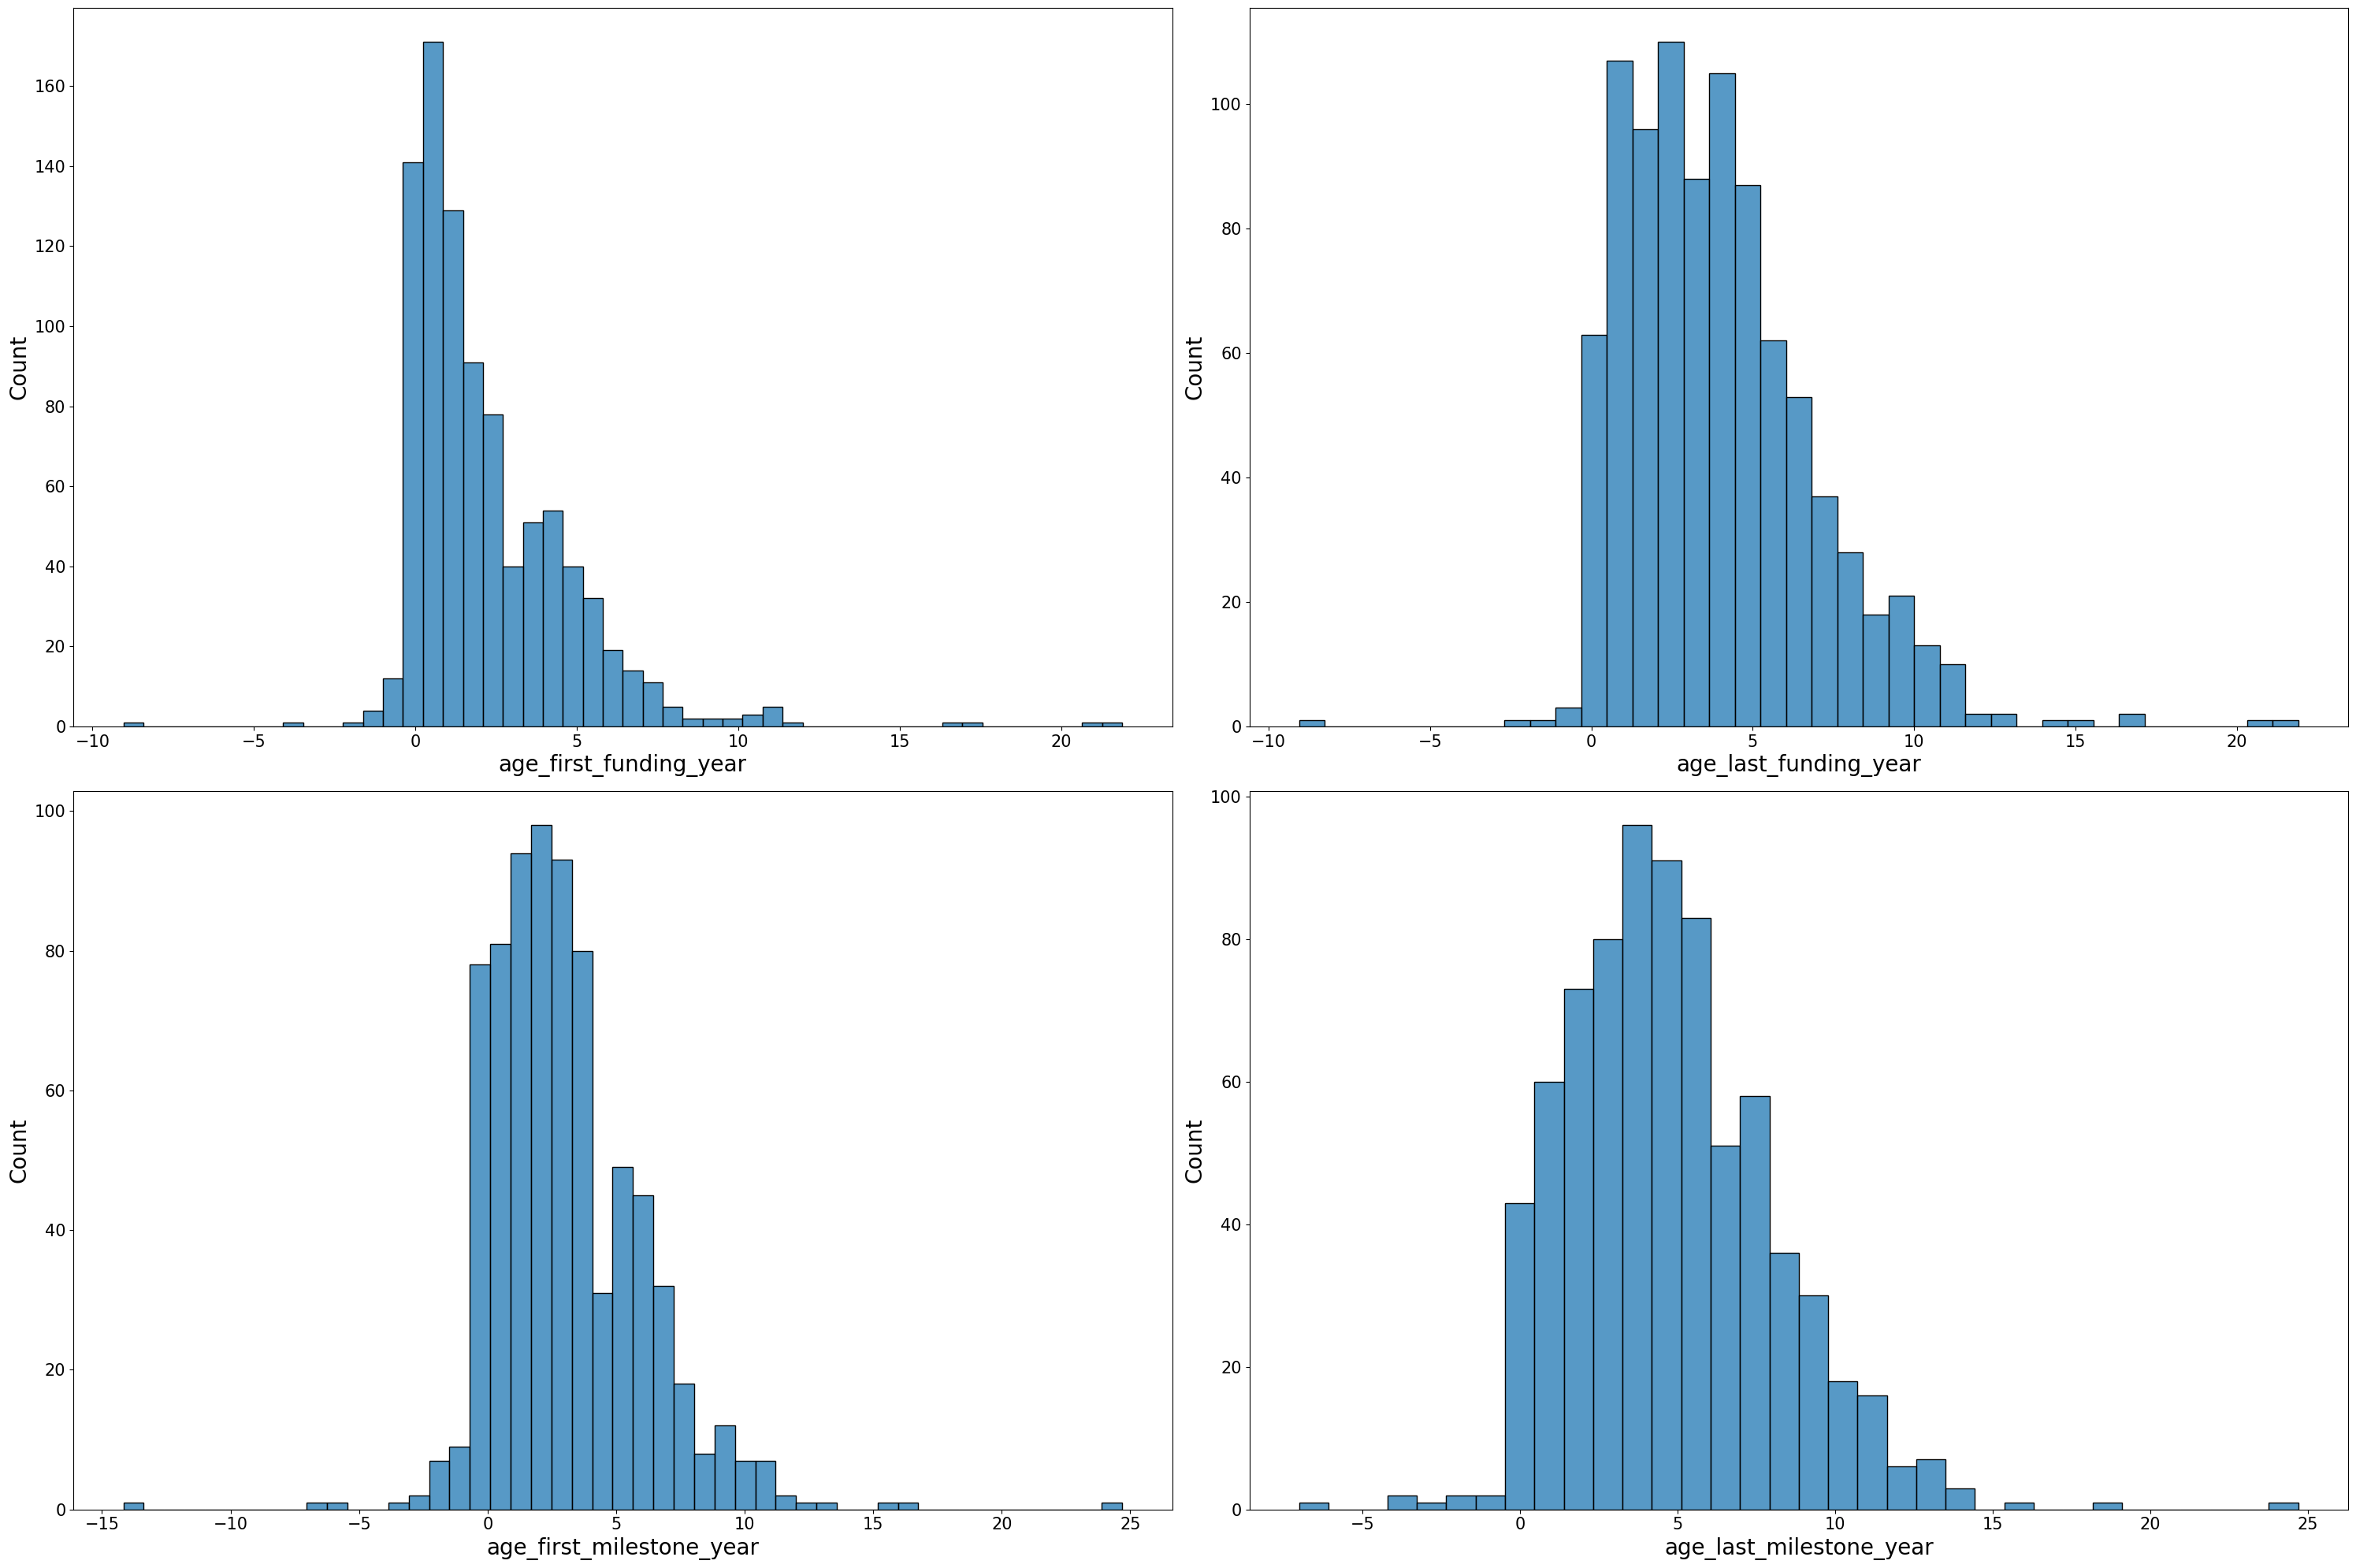

In [ ]:
var = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))
axes = axes.flatten()
for i, ax in enumerate(axes):
    sns.histplot(data=df_refine, x=var[i], ax=ax)
    ax.set_xlabel(var[i], fontsize=20)
    ax.set_ylabel('Count', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

plt.tight_layout()
plt.show()

In [ ]:
# check invalid(<0) funding year data
df_refine['age_first_funding_year'] = np.where(df_refine['age_first_funding_year']<0,0,df_refine['age_first_funding_year'])
df_refine['age_last_funding_year'] = np.where(df_refine['age_last_funding_year']<0,0,df_refine['age_last_funding_year'])
df_refine['age_first_milestone_year'] = np.where(df_refine['age_first_milestone_year']<0,0,df_refine['age_first_milestone_year'])
df_refine['age_last_milestone_year'] = np.where(df_refine['age_last_milestone_year']<0,0,df_refine['age_last_milestone_year'])
# fill missing value
df_refine['age_first_milestone_year'] = df_refine['age_first_milestone_year'].fillna(df_refine['age_first_milestone_year'].mode()[0])
df_refine['age_last_milestone_year'] = df_refine['age_last_milestone_year'].fillna(df_refine['age_last_milestone_year'].mode()[0])

In [ ]:
# drop dups
print("Before dropping duplicates: {}".format(len(df_refine)))
df_refine.drop_duplicates(inplace=True)
print("After ropping duplicates: {}".format(len(df_refine)))

Before dropping duplicates: 914
After ropping duplicates: 913


In [ ]:
# change dummies into string type
df_refine['has_VC'] = df_refine['has_VC'].apply(str)
df_refine['has_angel'] = df_refine['has_angel'].apply(str)
df_refine['has_roundA'] = df_refine['has_roundA'].apply(str)
df_refine['has_roundB'] = df_refine['has_roundB'].apply(str)
df_refine['has_roundC'] = df_refine['has_roundC'].apply(str)
df_refine['has_roundD'] = df_refine['has_roundD'].apply(str)
df_refine['is_top500'] = df_refine['is_top500'].apply(str)
df_refine['status'] = df_refine['status'].apply(str)

### Visualization

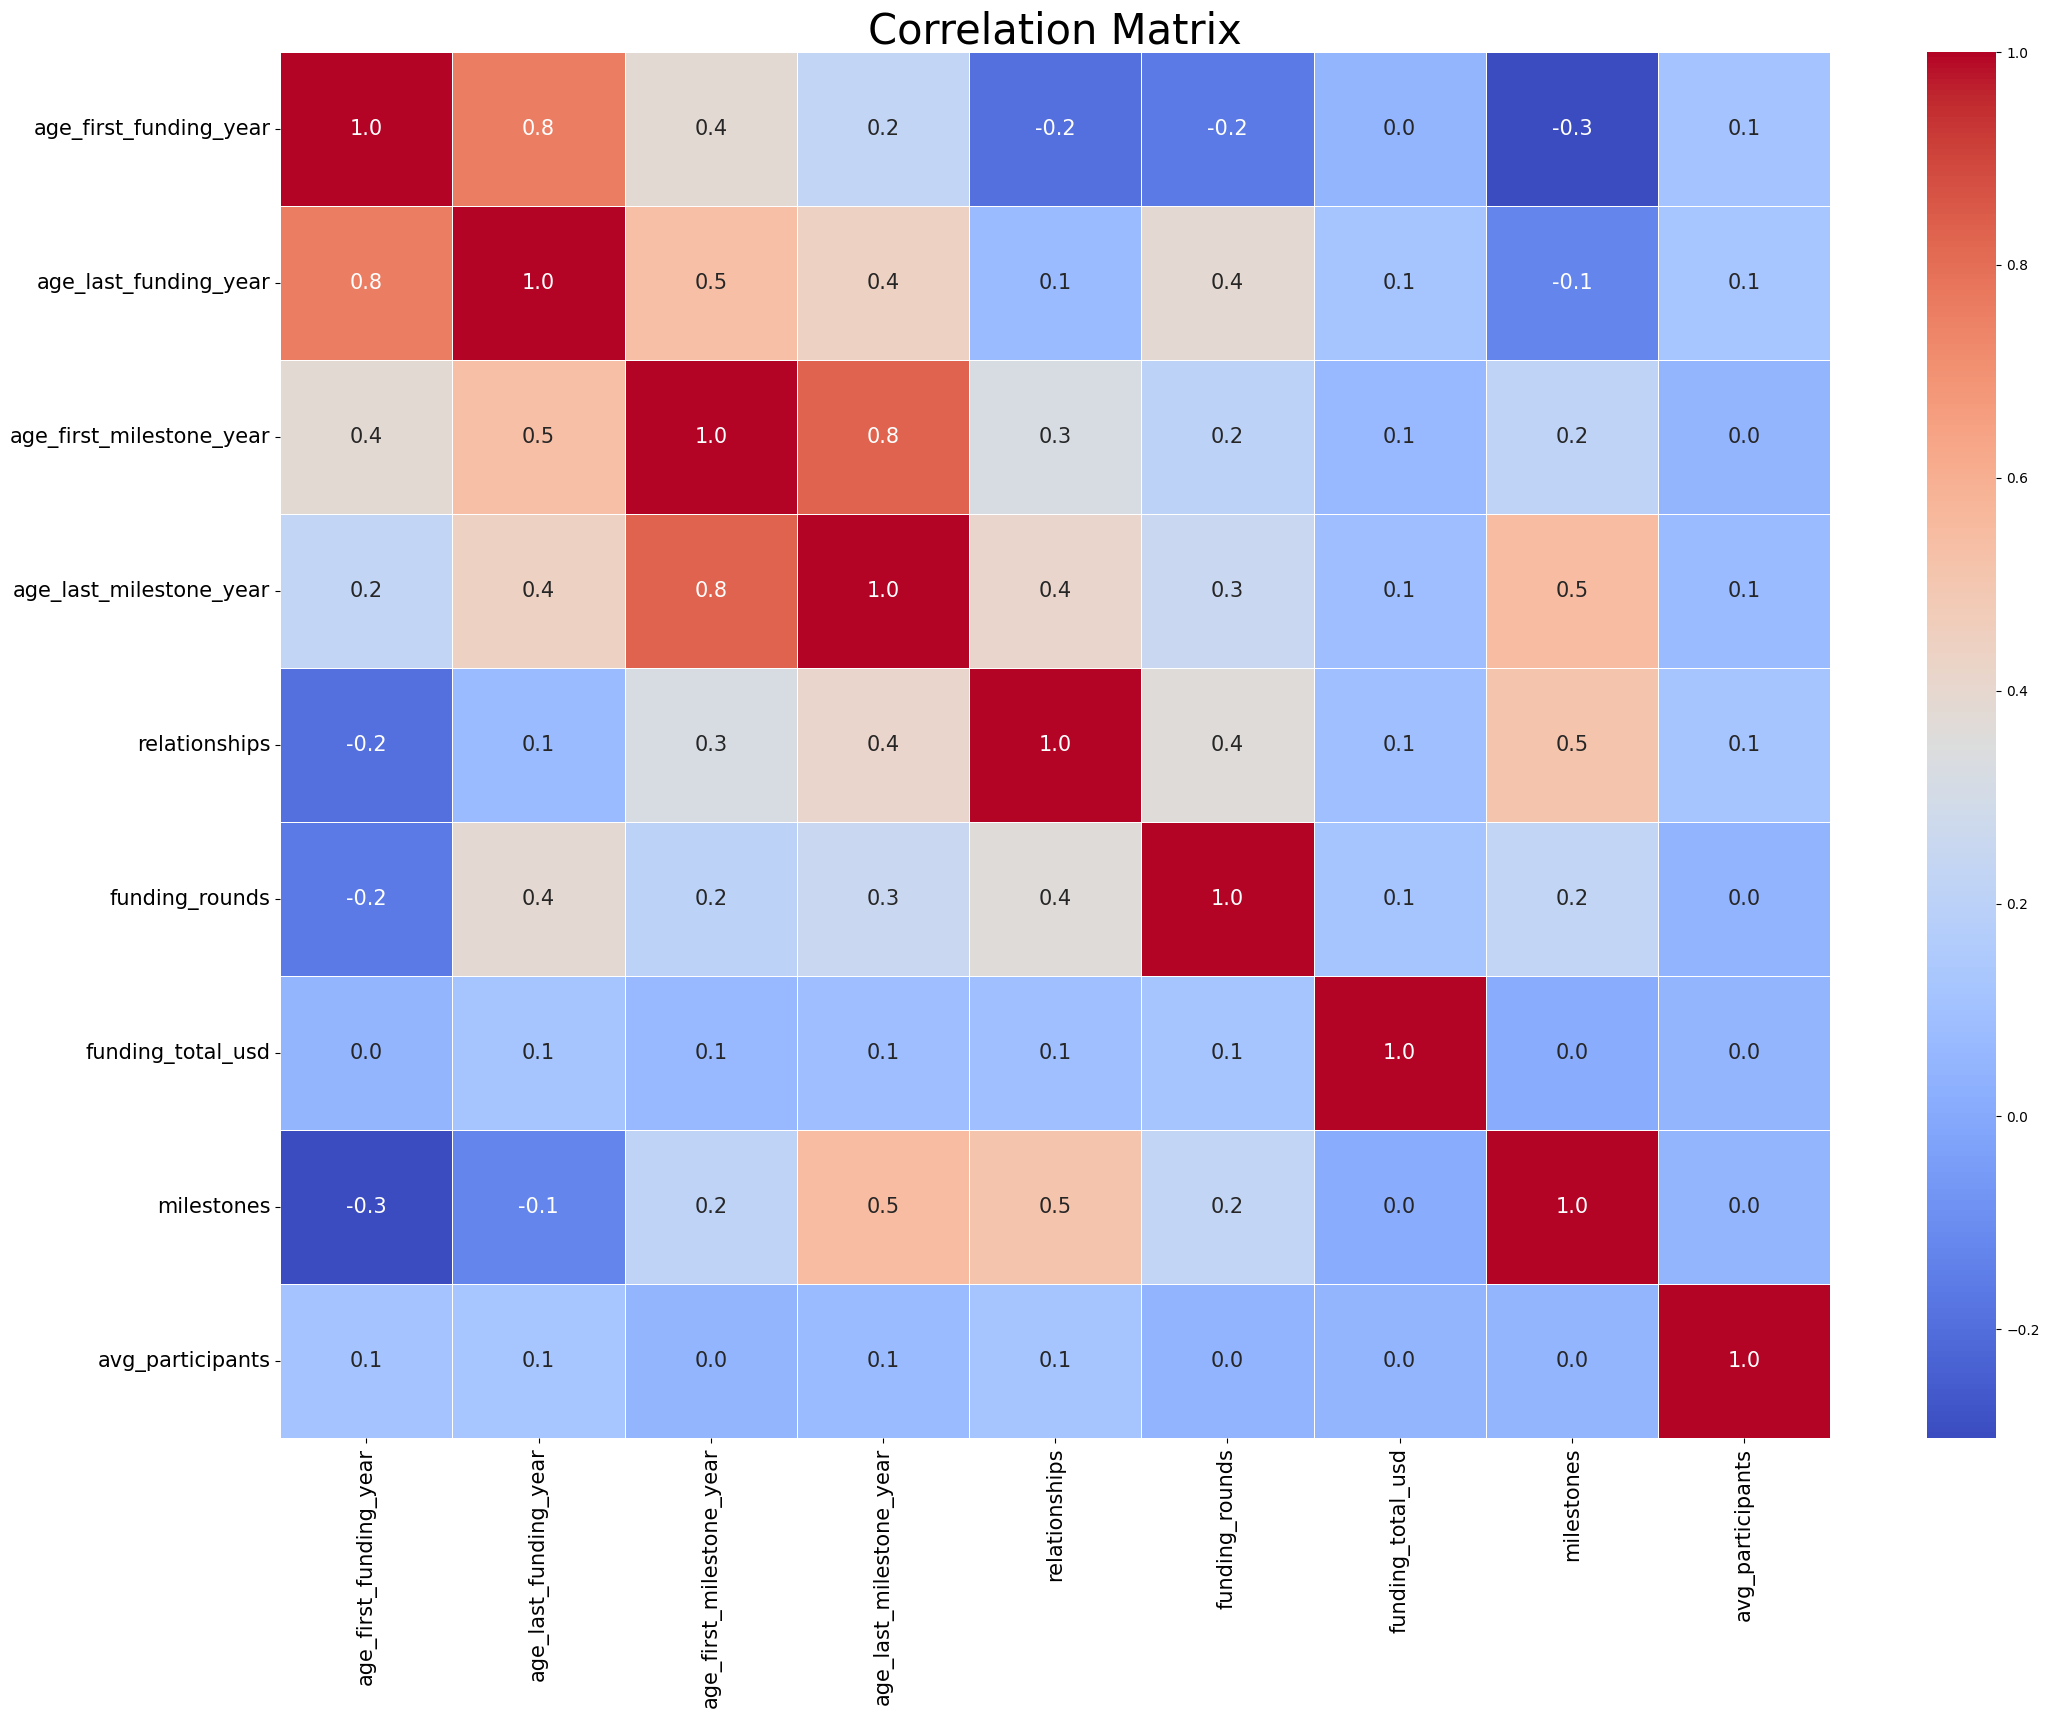

In [ ]:
# Correlation
df_num=df_refine.select_dtypes(include=np.number) # numeric feature only
plt.figure(figsize = (25, 18))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', linewidth=0.5, fmt='.1f', annot_kws={'size': 15})
plt.title('Correlation Matrix', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

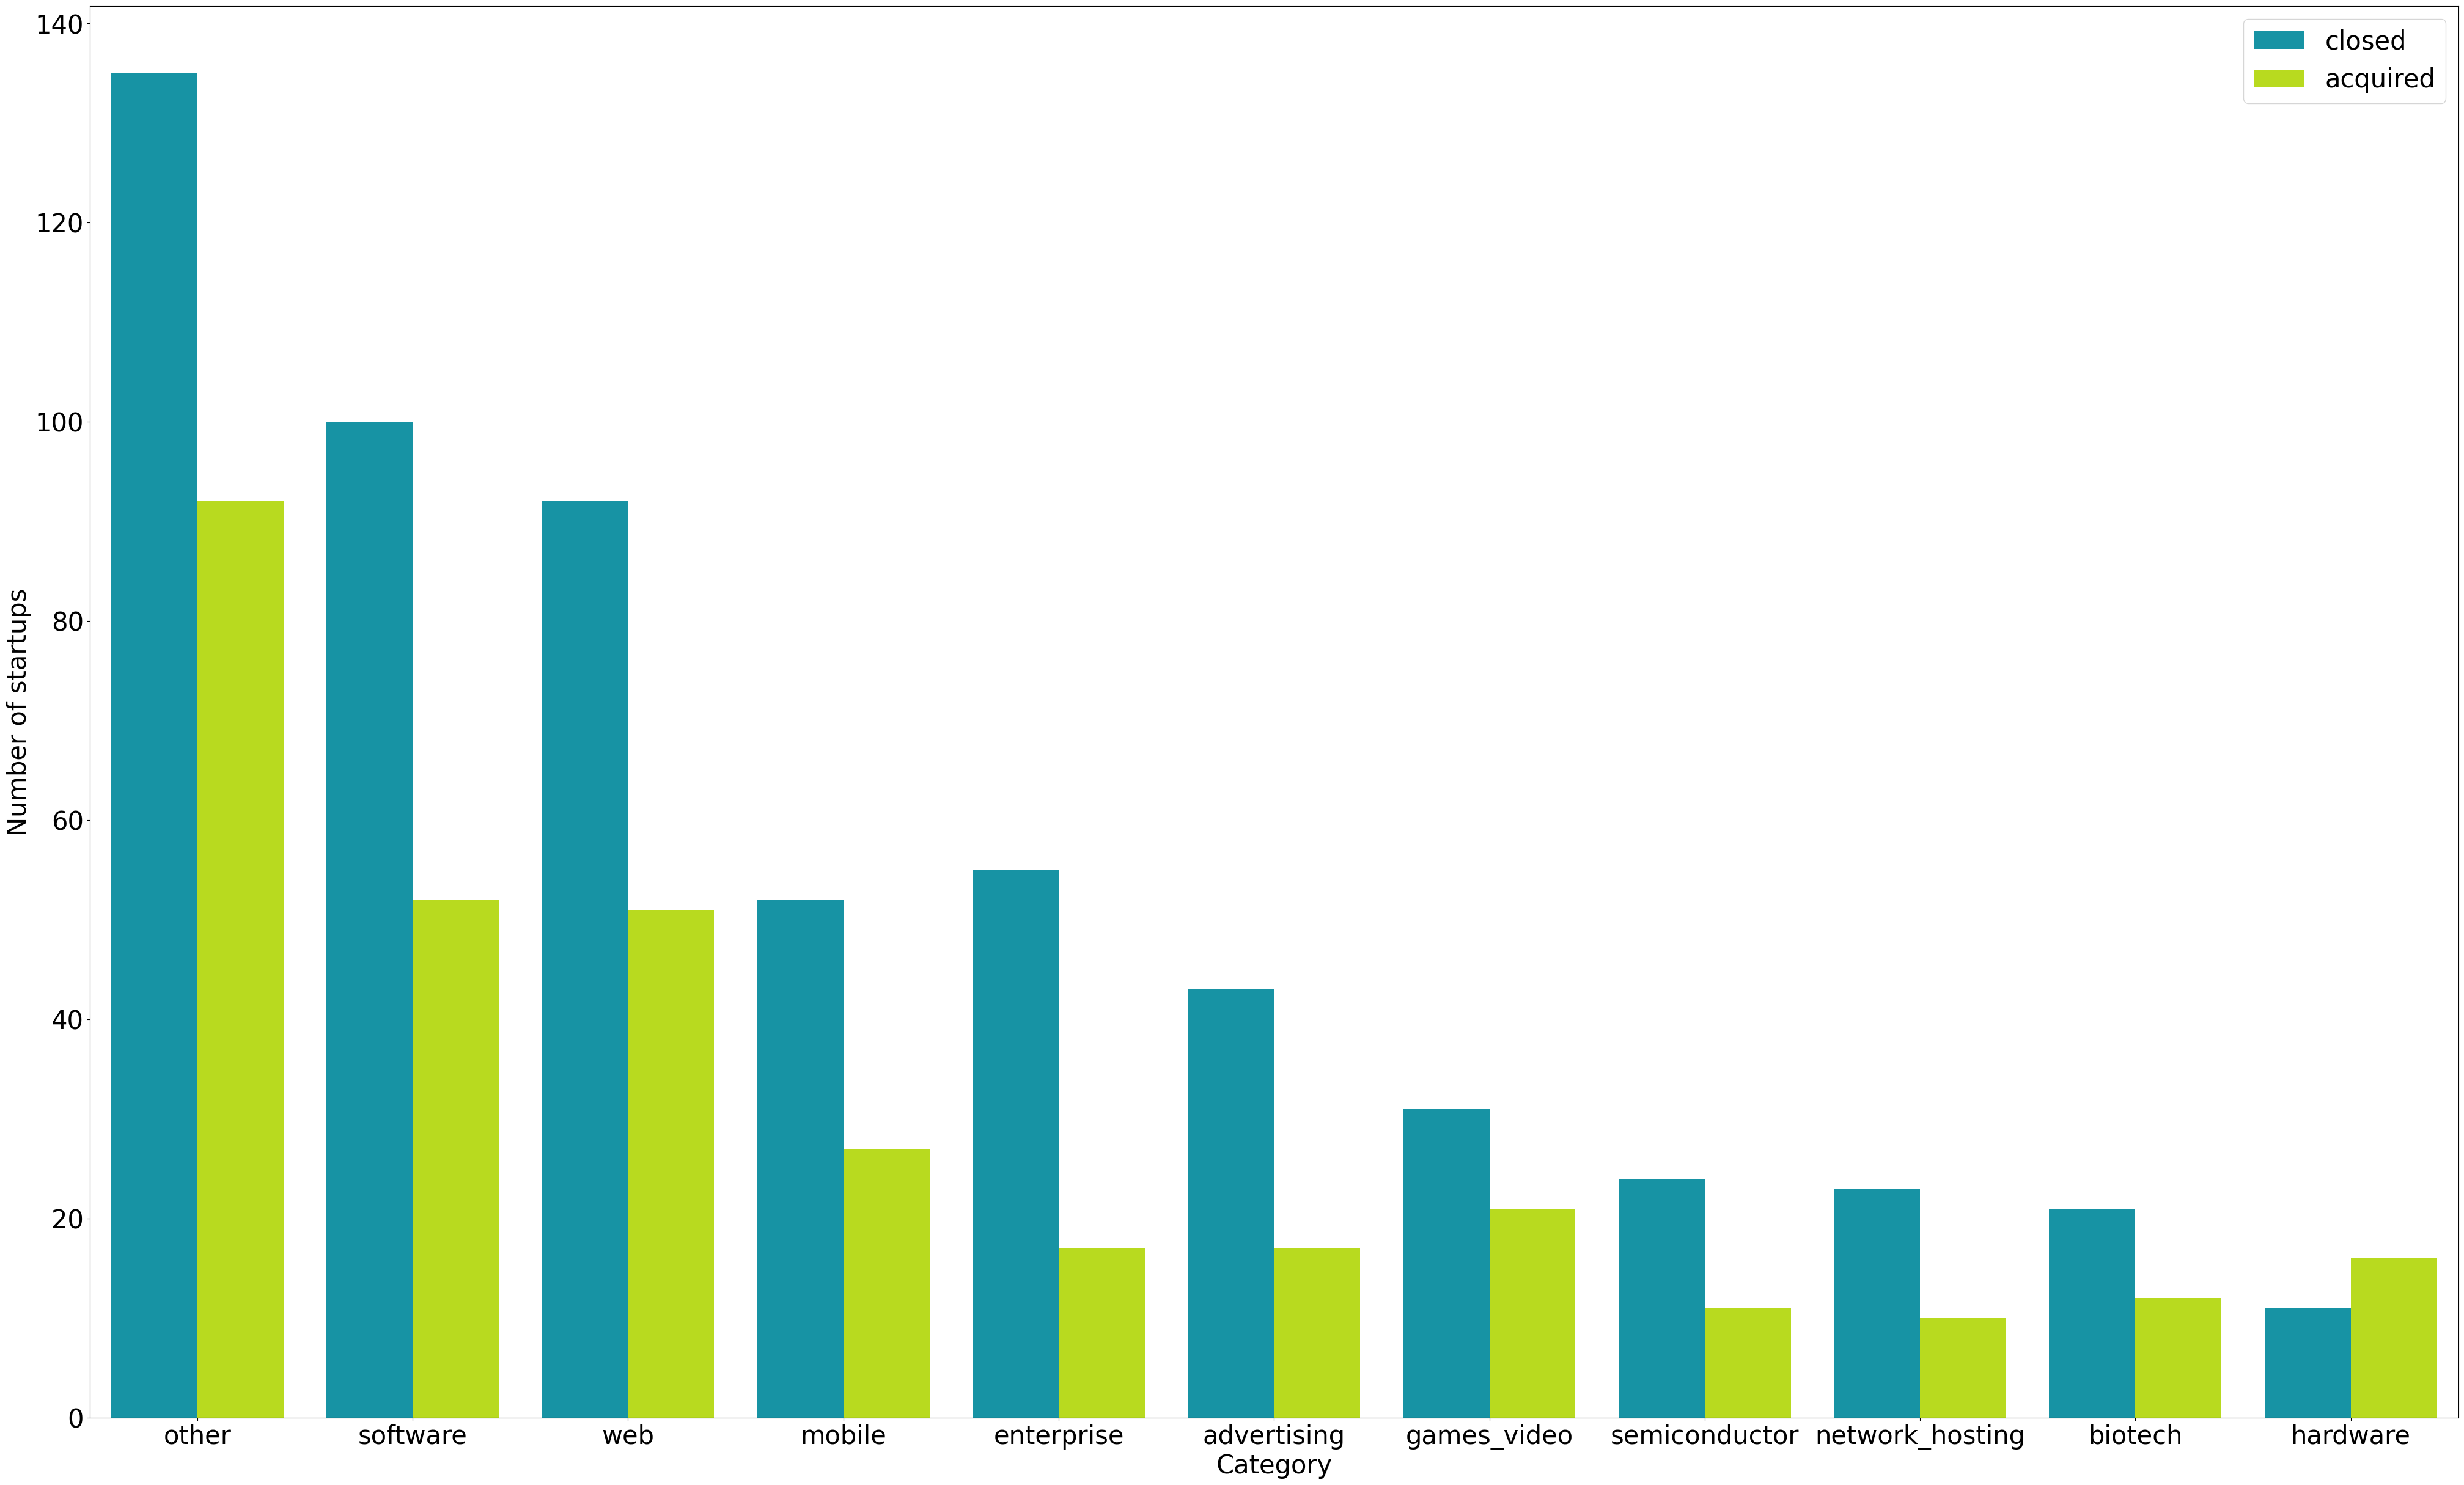

In [ ]:
fig,ax = plt.subplots(figsize=(50,30))
plot = sns.countplot(x='category',hue='status', palette = "nipy_spectral", data=df_refine, order= df_refine['category'].value_counts().index)
ax.set_xlabel("Category", fontsize=30)
ax.set_ylabel("Number of startups", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc = "upper right", fontsize = 30, labels = ['closed', 'acquired'])

In [ ]:
# sort success rate subject to industry
pivot_df = df_refine.pivot_table(index='category', columns='status', aggfunc='size')
pivot_df['total_startup'] = pivot_df.sum(axis=1)
pivot_df['success_rate%'] = (pivot_df['1'] / pivot_df['total_startup']) * 100
most_success_rate = pivot_df.sort_values('success_rate%', ascending=False)
most_success_rate

status,0,1,total_startup,success_rate%
category,,,,
enterprise,17,55,72,76.388889
advertising,17,43,60,71.666667
network_hosting,10,23,33,69.696970
semiconductor,11,24,35,68.571429
mobile,27,52,79,65.822785
software,52,100,152,65.789474
web,51,92,143,64.335664
biotech,12,21,33,63.636364
games_video,21,31,52,59.615385


In [ ]:
# sort funding scale subject to industry
sorted_df = df_refine.pivot_table(index=['category'], values = ['funding_total_usd'], aggfunc = 'sum').reset_index()
sorted_df.columns = ['category','total_funding']
sorted_df = sorted_df.sort_values(['total_funding'],ascending=False)
# Format total funding column with commas
sorted_df['total_funding'] = sorted_df['total_funding'].map('{:,}'.format)
sorted_df

,category,total_funding
5,mobile,"7,263,750,881"
7,other,"4,306,404,876"
9,software,"2,628,598,865"
10,web,"1,723,035,436"
1,biotech,"1,706,718,485"
2,enterprise,"1,332,889,780"
8,semiconductor,"1,105,156,970"
0,advertising,"875,219,012"
3,games_video,"844,643,530"
4,hardware,"773,938,873"


### Classification Model Fitting

In [ ]:
df_refine.select_dtypes(include=np.number).describe().astype(int)

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants
count,913,913,913,913,913,913,913,913,913
mean,2,3,2,3,7,2,25512365,1,2
std,2,2,2,3,7,1,190663229,1,1
min,0,0,0,0,0,1,11000,0,1
25%,0,1,0,1,3,1,2700000,1,1
50%,1,3,2,3,5,2,10000000,2,2
75%,3,5,4,6,10,3,24510540,3,4
max,21,21,24,24,63,10,5700000000,8,16


In [ ]:
X = df_refine.drop(['status'], axis = 1)
X['founded_year'] = X['founded_year'].astype(int)
y = df_refine['status']
y = y.astype(int)
x = pd.get_dummies(X.select_dtypes(include='object'), drop_first = True)
print(x.head())
print(x.shape)

# merge numberic columns in X and x
numeric_cols_x = X.select_dtypes(include='number')
X_merge = pd.concat([numeric_cols_x,x], axis=1)
X_merge.info()

   city_Addison  city_Alameda  city_Albuquerque  city_Aliso Viejo  \
0         False         False             False             False   
1         False         False             False             False   
2         False         False             False             False   
3         False         False             False             False   
4         False         False             False             False   

   city_Allentown  city_Alpharetta  city_Altamonte Springs  city_Andover  \
0           False            False                   False         False   
1           False            False                   False         False   
2           False            False                   False         False   
3           False            False                   False         False   
4           False            False                   False         False   

   city_Annapolis  city_Arcadia  ...  category_biotech  category_enterprise  \
0           False         False  ...             

In [ ]:
# set train and test dataset
xtrain, xtest, ytrain, ytest = train_test_split(X_merge, y, test_size = 0.25, random_state = 42)
print("Shape of the X Train :", xtrain.shape)
print("Shape of the y Train :", ytrain.shape)
print("Shape of the X test :", xtest.shape)
print("Shape of the y test :", ytest.shape)

Shape of the X Train : (684, 251)
Shape of the y Train : (684,)
Shape of the X test : (229, 251)
Shape of the y test : (229,)


In [ ]:
print(f'The mean of our target varibale = {round(np.mean(y),2)}')

The mean of our target varibale = 0.64


In [ ]:
# unbalanced target with 36% '0' samples.
import imblearn
print("imblearn version: ", imblearn.__version__)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12346)
xtrain_SMOTE, ytrain_SMOTE = sm.fit_resample(xtrain, ytrain)

print("Shape before SMOTE: ", xtrain.shape, ytrain.shape, "\n")
print("Shape after SMOTE: ", xtrain_SMOTE.shape, ytrain_SMOTE.shape, "\n")

imblearn version:  0.10.1
Shape before SMOTE:  (684, 251) (684,) 

Shape after SMOTE:  (858, 251) (858,) 



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Min-max scaler will not be used here based upon the assumption that all of the features are unbounded above.

stdsc = StandardScaler()  #we fit the StandardScaler class only once—on the training data—and use those parameters to transform the test dataset or any new data point.
xtrain_SMOTE_std = pd.DataFrame(stdsc.fit_transform(xtrain_SMOTE))
xtest_std = pd.DataFrame(stdsc.transform(xtest))

print("Checking: mean of column 0 of xtrain:",xtrain_SMOTE_std[0].mean(), " and its std deviation:", xtrain_SMOTE_std[0].std())

Checking: mean of column 0 of xtrain: 8.281383866667835e-17  and its std deviation: 1.0005832604753708


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE

In [ ]:
def modelfitting(model, xtrain_SMOTE_std, ytrain_SMOTE, xtest_std, ytest):
  # feature selection to improve model robustness: RFE
  rfe = RFE(estimator=model, n_features_to_select=10)
  _ = rfe.fit(xtrain_SMOTE_std,ytrain_SMOTE)
  print('Important Features\n',X_merge.columns[rfe.support_])
  _ = model.fit(rfe.transform(xtrain_SMOTE_std), ytrain_SMOTE)
  y_predicted = model.predict(rfe.transform(xtest_std))

  print(f'For {model} :')
  print('Train Accuracy: ',model.score(rfe.transform(xtrain_SMOTE_std), ytrain_SMOTE))
  print('Test Accuracy: ',model.score(rfe.transform(xtest_std), ytest))
  print('AUC Score:',roc_auc_score(ytest, y_predicted))
  print(f'Confusion matrix: {confusion_matrix(ytest, y_predicted)}')

In [ ]:
# Model 1: Random Forest
modelfitting(RandomForestClassifier(random_state=42),xtrain_SMOTE_std, ytrain_SMOTE, xtest_std, ytest)

Important Features
 Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'avg_participants',
       'founded_year'],
      dtype='object')
For RandomForestClassifier(random_state=42) :
Train Accuracy:  1.0
Test Accuracy:  0.8165938864628821
AUC Score: 0.7779015867356035
Confusion matrix: [[ 48  23]
 [ 19 139]]


In [ ]:
# Model 2: Adaboost
ab = AdaBoostClassifier(random_state=42)
modelfitting(ab,xtrain_SMOTE_std, ytrain_SMOTE, xtest_std, ytest)

Important Features
 Index(['age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'avg_participants', 'founded_year', 'has_VC_1',
       'category_software'],
      dtype='object')
For AdaBoostClassifier(random_state=42) :
Train Accuracy:  0.8193473193473193
Test Accuracy:  0.7554585152838428
AUC Score: 0.7374754858263505
Confusion matrix: [[ 49  22]
 [ 34 124]]


In [ ]:
# Model 3: LogisticRegression
lr = LogisticRegression(random_state=42)
modelfitting(lr ,xtrain_SMOTE_std, ytrain_SMOTE, xtest_std, ytest)

Important Features
 Index(['age_first_funding_year', 'age_last_milestone_year', 'relationships',
       'city_Cambridge', 'city_Cupertino', 'city_Hollywood',
       'city_Los Angeles', 'city_Plano', 'city_Playa Vista',
       'city_Redwood City'],
      dtype='object')
For LogisticRegression(random_state=42) :
Train Accuracy:  0.7517482517482518
Test Accuracy:  0.7117903930131004
AUC Score: 0.7174630058834017
Confusion matrix: [[ 52  19]
 [ 47 111]]


In [ ]:
# Model 4: GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
modelfitting(gb,xtrain_SMOTE_std, ytrain_SMOTE, xtest_std, ytest)

Important Features
 Index(['age_first_funding_year', 'age_last_funding_year',
       'age_last_milestone_year', 'relationships', 'funding_total_usd',
       'milestones', 'avg_participants', 'founded_year', 'city_Los Angeles',
       'has_VC_1'],
      dtype='object')
For GradientBoostingClassifier(random_state=42) :
Train Accuracy:  0.9137529137529138
Test Accuracy:  0.7903930131004366
AUC Score: 0.7434034587270458
Confusion matrix: [[ 44  27]
 [ 21 137]]


In [ ]:
# Model 5: LGBMClassifier
lgbm = LGBMClassifier(random_state=42)
modelfitting(lgbm,xtrain_SMOTE_std, ytrain_SMOTE, xtest_std, ytest)

[LightGBM] [Info] Number of positive: 429, number of negative: 429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 858, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 429, number of negative: 429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number o

In [ ]:
# Model 6: DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
modelfitting(dt,xtrain_SMOTE_std, ytrain_SMOTE, xtest_std, ytest)

Important Features
 Index(['age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'avg_participants', 'founded_year',
       'city_San Jose'],
      dtype='object')
For DecisionTreeClassifier(random_state=42) :
Train Accuracy:  1.0
Test Accuracy:  0.6768558951965066
AUC Score: 0.6339811018006775
Confusion matrix: [[ 37  34]
 [ 40 118]]


In [ ]:
# Model 7: KNeighborsClassifier
# use selectKBest to select important features
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10)

# Fit the selector on the training data
selector.fit(xtrain_SMOTE_std, ytrain_SMOTE)
selected_features_indices = selector.get_support(indices=True)
xtrain_selected = xtrain_SMOTE_std.iloc[:, selected_features_indices]
xtest_selected = xtest_std.iloc[:, selected_features_indices]

# Now you can train your model and make predictions using the selected features
knn = KNeighborsClassifier()
knn.fit(xtrain_selected, ytrain_SMOTE)
y_predicted = knn.predict(xtest_selected)

print(f'For KNN :')
print('\n Train Accuracy: ',knn.score(xtrain_selected, ytrain_SMOTE))
print('\n Test Accuracy: ',knn.score(xtest_selected, ytest))
print('\n AUC Score:',roc_auc_score(ytest, y_predicted))
print(f'\nconfusion matrix : {confusion_matrix(ytest, y_predicted)}')

For KNN :

 Train Accuracy:  0.837995337995338

 Test Accuracy:  0.7379912663755459

 AUC Score: 0.6976733820645391

confusion matrix : [[ 42  29]
 [ 31 127]]


Model Selcetion: Based on Test Accuracy and Auc Score, we pick Random Forest as our classifier.

|**Regressor** |       Accuracy | AUC Score | Confusion Matrix |
|:----------------------|:--------------:|:--------------:|:--------------:|
|Random Forest | 0.817 |0.778| $$\begin{bmatrix} 48 & 23 \\ 19 & 139\\\end{bmatrix}$$ |
|Adaboost   | 0.755 |0.737| $$\begin{bmatrix} 49 & 22 \\ 34 & 124\\\end{bmatrix}$$ |
|LogisticRegression | 0.712 |0.717| $$\begin{bmatrix} 52 & 19 \\ 47 & 111\\\end{bmatrix}$$ |
|GradientBoosting | 0.790 |0.743| $$\begin{bmatrix} 44 & 27 \\ 21 & 137\\\end{bmatrix}$$ |
|LGBM | 0.786 |0.744| $$\begin{bmatrix} 45 & 26 \\ 23 & 135\\\end{bmatrix}$$ |
|DecisionTree | 0.677 |0.634| $$\begin{bmatrix} 37 & 34 \\ 40 & 118\\\end{bmatrix}$$ |
|KNeighbors | 0.738 |0.698| $$\begin{bmatrix} 42 & 29 \\ 31 & 127\\\end{bmatrix}$$ |

# Model Tuning & Hyperparameter

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
model = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', RandomForestClassifier())
])
# Adjust as needed
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__bootstrap': [True, False]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid.fit(xtrain_SMOTE_std, ytrain_SMOTE)

test_score = grid.score(xtest_std, ytest)
print(f'Test set AUC Score: {test_score}')
print(grid.best_params_)
print(grid.best_estimator_)

Test set AUC Score: 0.8415047245498306
{'clf__bootstrap': False, 'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 300}
Pipeline(steps=[('sample', SMOTE()), ('std', StandardScaler()),
                ('clf',
                 RandomForestClassifier(bootstrap=False, max_depth=20,
                                        n_estimators=300))])


# Model Comparison

In [ ]:
# rerun Random Forest
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
_ = rfe.fit(xtrain_SMOTE_std,ytrain_SMOTE)
selected_features = X_merge.columns[rfe.support_]

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
%matplotlib inline
# Get feature importances
best = grid.best_estimator_
importances = best.named_steps['clf'].feature_importances_

selected_features_importance = {}
for feature_name, importance in zip(selected_features, importances):
    if feature_name in selected_features:
        selected_features_importance[feature_name] = importance

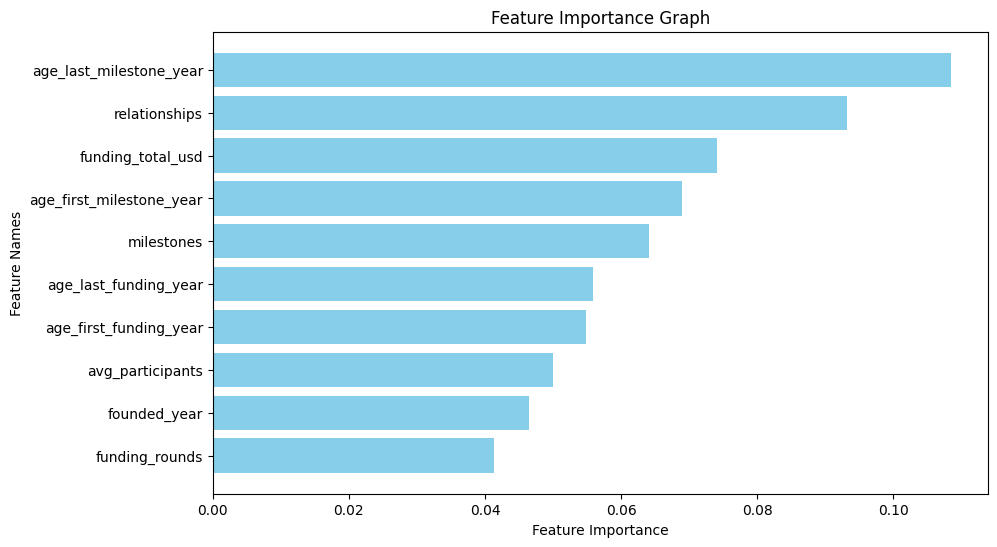

In [ ]:
# Feature importance for selected feature
# Sort the scores in descending order
sorted_importance = sorted(selected_features_importance.items(), key=lambda x: x[1], reverse=False)
features = [feature[0] for feature in sorted_importance]
importances = [feature[1] for feature in sorted_importance]
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance Graph")
plt.show()

[[ 43  28]
 [ 17 141]]
Accuracy: 0.8034934497816594
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.61      0.66        71
           1       0.83      0.89      0.86       158

    accuracy                           0.80       229
   macro avg       0.78      0.75      0.76       229
weighted avg       0.80      0.80      0.80       229



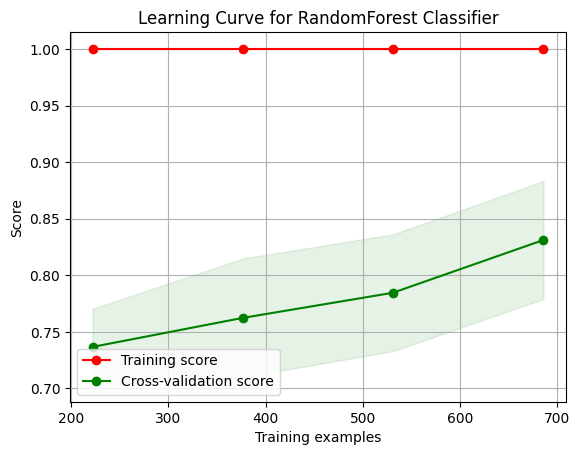

In [ ]:
# Learning Curve Function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(grid.best_estimator_, 'Learning Curve for RandomForest Classifier', xtrain_SMOTE_std, ytrain_SMOTE, cv=5)

# Predicting the Test set results and evaluating the model
y_pred = grid.predict(xtest_std)
cm = confusion_matrix(ytest, y_pred)
print(cm)
print("Accuracy:", accuracy_score(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))

Model Optimization: After tunning RF model with Gridsearch function, we get Accuracy of 0.795 and a AUC score of 0.837. Compared to the model before tuning, the Accuracy is 0.817 and the AUC score is 0.778. We can tell an ideal improvement in model performance as there is a 7.6% increase in AUC score and a slight decrease in Accuracy.